In [22]:
import os 

import matplotlib.pyplot as plt
import networkx as nx

data_dir = '../data'

# Node classification

In [55]:
dataset = 'node2vec_PPI'
node_file = 'node2vec_PPI_labels.txt'
edge_file = 'node2vec_PPI.edgelist'

In [56]:
def read_node_labels(filename):
    fin = open(filename, 'r')
    node_list = []
    labels = []
    while 1:
        l = fin.readline()
        if l == '':
            break
        vec = l.strip().split()
        node_list.append(vec[0])
        labels.append(vec[1:])
    fin.close()
    print('Nodes with labels: %s'%len(node_list))
    return node_list, labels


def read_for_SVD(filename, weighted=False):
    if weighted:
        G = nx.read_weighted_edgelist(filename)
    else:
        G = nx.read_edgelist(filename)
    return G

Nodes with labels: 3890


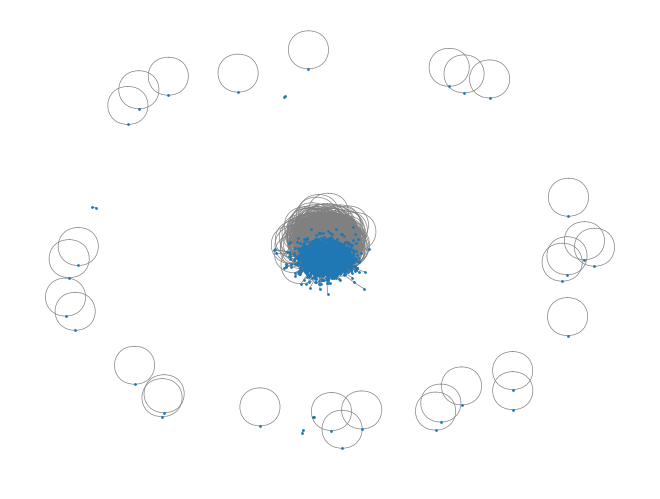

In [58]:
node_list, labels = read_node_labels(os.path.join(data_dir, dataset, node_file))
node_dict = {node: {'label': node, 'value': label} for node, label in zip(node_list, labels)}    

G = read_for_SVD(os.path.join(data_dir, dataset, edge_file), weighted=True)
G.add_nodes_from(node_dict)

pos = nx.spring_layout(G)
# pos = nx.circular_layout(G)
nx.draw(
    G, pos, label='label',
    node_size=1,
    edge_color='gray', width=0.5
)
plt.show()

# Link prediction

In [50]:
dataset = 'STRING_PPI'
node_file = 'node_list.txt'
edge_file = 'STRING_PPI.edgelist'

In [51]:
node_list, labels = read_node_labels(os.path.join(data_dir, dataset, node_file))
node_dict = {node: {'label': label} for node, label in zip(node_list, labels)}    

G = read_for_SVD(os.path.join(data_dir, dataset, edge_file), weighted=True)
G.add_nodes_from(node_dict)

pos = nx.spring_layout(G)
# pos = nx.circular_layout(G)
# pos = nx.random_layout(G)
nx.draw(
    G, pos, 
    node_size=10,
    edge_color='gray', width=1.0
)
plt.show()

Nodes with labels: 15132


KeyboardInterrupt: 

In [20]:
nodes, labels = read_node_file(os.path.join(data_dir, dataset, node_file))
# G = read_edge_file(os.path.join(data_dir, dataset, edge_file), weighted=True)
# G.add_nodes_from(nodes_dict.items())

Nodes with labels: 3890


[['6', '16', '37', '39', '46'],
 ['30'],
 ['5'],
 ['30'],
 ['2', '9'],
 ['3', '22', '25'],
 ['42'],
 ['3'],
 ['28', '49'],
 ['27'],
 ['10'],
 ['46'],
 ['27', '34'],
 ['27', '34'],
 ['28'],
 ['6', '34'],
 ['21'],
 ['32', '40'],
 ['24', '26', '27', '30'],
 ['27'],
 ['8'],
 ['49'],
 ['26', '34', '44'],
 ['10'],
 ['40', '49'],
 ['28', '40'],
 ['36', '39'],
 ['10'],
 ['6'],
 ['3', '24'],
 ['3', '46'],
 ['5', '13', '17', '39'],
 ['3', '5'],
 ['23'],
 ['3', '20', '31'],
 ['38'],
 ['23'],
 ['7', '14', '23', '29'],
 ['13', '32'],
 ['24', '26'],
 ['48'],
 ['22'],
 ['20', '34'],
 ['20'],
 ['42'],
 ['13', '24'],
 ['13'],
 ['6', '13', '30', '34', '42', '44'],
 ['45'],
 ['6', '23', '32'],
 ['4', '6', '8'],
 ['35'],
 ['6', '38'],
 ['36'],
 ['9'],
 ['42'],
 ['31'],
 ['31'],
 ['12'],
 ['17', '24', '31'],
 ['13', '23', '46'],
 ['41'],
 ['11'],
 ['48'],
 ['37'],
 ['28'],
 ['37'],
 ['6', '35'],
 ['6'],
 ['3', '13', '46'],
 ['39'],
 ['26'],
 ['11'],
 ['48'],
 ['7', '16', '23'],
 ['7', '19', '45'],
 ['19', 

In [ ]:

# Function to read node file
def read_node_file(node_file):
    nodes = {}
    with open(node_file, 'r') as file:
        for line in file:
            index, node_id = line.strip().split()
            nodes[int(index)] = node_id
    return nodes

# Function to read edge list file
def read_edge_list(edge_list_file):
    edges = []
    with open(edge_list_file, 'r') as file:
        for line in file:
            u, v = map(int, line.strip().split())
            edges.append((u, v))
    return edges

# Function to visualize the graph
def visualize_graph(node_file, edge_list_file):
    # Read nodes and edges
    nodes = read_node_file(node_file)
    edges = read_edge_list(edge_list_file)

    # Create a graph
    G = nx.Graph()

    # Add nodes to the graph
    for index, node_id in nodes.items():
        G.add_node(index, label=node_id)

    # Add edges to the graph
    G.add_edges_from(edges)

    # Draw the graph
    pos = nx.spring_layout(G)  # You can use different layout algorithms
    labels = nx.get_node_attributes(G, 'label')
    nx.draw(G, pos, with_labels=True, labels=labels)
    plt.show()

# Example usage
node_file = 'node.txt'
edge_list_file = 'edge_list.txt'
visualize_graph(node_file, edge_list_file)